In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('french'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
def tokenize_text(text):
    tokens = word_tokenize(text.lower())
    return [token for token in tokens if token.isalnum()]

In [5]:
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

In [6]:
# Read the validation data
train_df = pd.read_csv('data/train.csv')

In [7]:
train_df

,text,titles
0,Thierry Mariani sur la liste du Rassemblement ...,L'information n'a pas été confirmée par l'inté...
1,C'est désormais officiel : Alain Juppé n'est p...,Le maire de Bordeaux ne fait plus partie des R...
2,La mesure est décriée par les avocats et les m...,"En 2020, les tribunaux d'instance fusionnent a..."
3,Dans une interview accordée au Figaro mercredi...,"Les médecins jugés ""gros prescripteurs d'arrêt..."
4,Le préjudice est estimé à 2 millions d'euros. ...,Il aura fallu mobiliser 90 gendarmes pour cett...
...,...,...
21396,"Une ""main tendue"" que refuse de saisir l'eurod...",POLITIQUE. La présidente du Front national a s...
21397,"Venue présenter son dernier spectacle, Elektri...",Que serait un dimanche matin sans un passage e...
21398,Mauvaise nouvelle pour les amateurs de chasse ...,"La chasse à la glu sera interdite cette année,..."
21399,"""Ce n'est pas une question de simple voile, c'...","Bruno Le Maire, candidat à la primaire de la d..."


In [9]:
stop_words

{'ai',
 'aie',
 'aient',
 'aies',
 'ait',
 'as',
 'au',
 'aura',
 'aurai',
 'auraient',
 'aurais',
 'aurait',
 'auras',
 'aurez',
 'auriez',
 'aurions',
 'aurons',
 'auront',
 'aux',
 'avaient',
 'avais',
 'avait',
 'avec',
 'avez',
 'aviez',
 'avions',
 'avons',
 'ayant',
 'ayante',
 'ayantes',
 'ayants',
 'ayez',
 'ayons',
 'c',
 'ce',
 'ces',
 'd',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'es',
 'est',
 'et',
 'eu',
 'eue',
 'eues',
 'eurent',
 'eus',
 'eusse',
 'eussent',
 'eusses',
 'eussiez',
 'eussions',
 'eut',
 'eux',
 'eûmes',
 'eût',
 'eûtes',
 'furent',
 'fus',
 'fusse',
 'fussent',
 'fusses',
 'fussiez',
 'fussions',
 'fut',
 'fûmes',
 'fût',
 'fûtes',
 'il',
 'ils',
 'j',
 'je',
 'l',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'm',
 'ma',
 'mais',
 'me',
 'mes',
 'moi',
 'mon',
 'même',
 'n',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ont',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 's',
 'sa',
 'se',
 'sera',
 'serai',
 'seraient',
 'serais',
 'serait',


In [8]:
train_df['news_tokens'] = train_df['text'].apply(tokenize_text)
train_df['title_tokens'] = train_df['titles'].apply(tokenize_text)

In [10]:
train_df

,text,titles,news_tokens,title_tokens
0,Thierry Mariani sur la liste du Rassemblement ...,L'information n'a pas été confirmée par l'inté...,"[thierry, mariani, sur, la, liste, du, rassemb...","[n, a, pas, été, confirmée, par, qui, déclare,..."
1,C'est désormais officiel : Alain Juppé n'est p...,Le maire de Bordeaux ne fait plus partie des R...,"[désormais, officiel, alain, juppé, plus, memb...","[le, maire, de, bordeaux, ne, fait, plus, part..."
2,La mesure est décriée par les avocats et les m...,"En 2020, les tribunaux d'instance fusionnent a...","[la, mesure, est, décriée, par, les, avocats, ...","[en, 2020, les, tribunaux, fusionnent, avec, c..."
3,Dans une interview accordée au Figaro mercredi...,"Les médecins jugés ""gros prescripteurs d'arrêt...","[dans, une, interview, accordée, au, figaro, m...","[les, médecins, jugés, gros, prescripteurs, ma..."
4,Le préjudice est estimé à 2 millions d'euros. ...,Il aura fallu mobiliser 90 gendarmes pour cett...,"[le, préjudice, est, estimé, à, 2, millions, u...","[il, aura, fallu, mobiliser, 90, gendarmes, po..."
...,...,...,...,...
21396,"Une ""main tendue"" que refuse de saisir l'eurod...",POLITIQUE. La présidente du Front national a s...,"[une, main, tendue, que, refuse, de, saisir, n...","[politique, la, présidente, du, front, nationa..."
21397,"Venue présenter son dernier spectacle, Elektri...",Que serait un dimanche matin sans un passage e...,"[venue, présenter, son, dernier, spectacle, el...","[que, serait, un, dimanche, matin, sans, un, p..."
21398,Mauvaise nouvelle pour les amateurs de chasse ...,"La chasse à la glu sera interdite cette année,...","[mauvaise, nouvelle, pour, les, amateurs, de, ...","[la, chasse, à, la, glu, sera, interdite, cett..."
21399,"""Ce n'est pas une question de simple voile, c'...","Bruno Le Maire, candidat à la primaire de la d...","[ce, pas, une, question, de, simple, voile, un...","[bruno, le, maire, candidat, à, la, primaire, ..."


In [12]:
train_df['news_tokens'] = train_df['news_tokens'].apply(remove_stopwords)
train_df['title_tokens'] = train_df['title_tokens'].apply(remove_stopwords)

In [13]:
train_df

,text,titles,news_tokens,title_tokens
0,Thierry Mariani sur la liste du Rassemblement ...,L'information n'a pas été confirmée par l'inté...,"[thierry, mariani, liste, rassemblement, natio...","[a, confirmée, déclare, toutefois, étudier, qu..."
1,C'est désormais officiel : Alain Juppé n'est p...,Le maire de Bordeaux ne fait plus partie des R...,"[désormais, officiel, alain, juppé, plus, memb...","[maire, bordeaux, fait, plus, partie, républic..."
2,La mesure est décriée par les avocats et les m...,"En 2020, les tribunaux d'instance fusionnent a...","[mesure, décriée, avocats, magistrats, juridic...","[2020, tribunaux, fusionnent, ceux, grande, in..."
3,Dans une interview accordée au Figaro mercredi...,"Les médecins jugés ""gros prescripteurs d'arrêt...","[interview, accordée, figaro, mercredi, 17, oc...","[médecins, jugés, gros, prescripteurs, maladie..."
4,Le préjudice est estimé à 2 millions d'euros. ...,Il aura fallu mobiliser 90 gendarmes pour cett...,"[préjudice, estimé, 2, millions, réseau, reven...","[fallu, mobiliser, 90, gendarmes, cette, opéra..."
...,...,...,...,...
21396,"Une ""main tendue"" que refuse de saisir l'eurod...",POLITIQUE. La présidente du Front national a s...,"[main, tendue, refuse, saisir, nadine, morano,...","[politique, présidente, front, national, a, su..."
21397,"Venue présenter son dernier spectacle, Elektri...",Que serait un dimanche matin sans un passage e...,"[venue, présenter, dernier, spectacle, elektri...","[dimanche, matin, sans, passage, revue, critiq..."
21398,Mauvaise nouvelle pour les amateurs de chasse ...,"La chasse à la glu sera interdite cette année,...","[mauvaise, nouvelle, amateurs, chasse, glu, je...","[chasse, glu, interdite, cette, année, a, anno..."
21399,"""Ce n'est pas une question de simple voile, c'...","Bruno Le Maire, candidat à la primaire de la d...","[question, simple, voile, question, provocatio...","[bruno, maire, candidat, primaire, droite, rev..."


In [14]:
news_words = [word for sublist in train_df['news_tokens'] for word in sublist]
title_words = [word for sublist in train_df['title_tokens'] for word in sublist]

In [15]:
news_word_freq = Counter(news_words)
title_word_freq = Counter(title_words)

In [19]:
del news_word_freq['a']
del title_word_freq['a']

In [40]:
count = 100
common_news_words = sorted(news_word_freq.items(), key=lambda x: x[1], reverse=True)[:count]
common_title_words = sorted(title_word_freq.items(), key=lambda x: x[1], reverse=True)[:count]

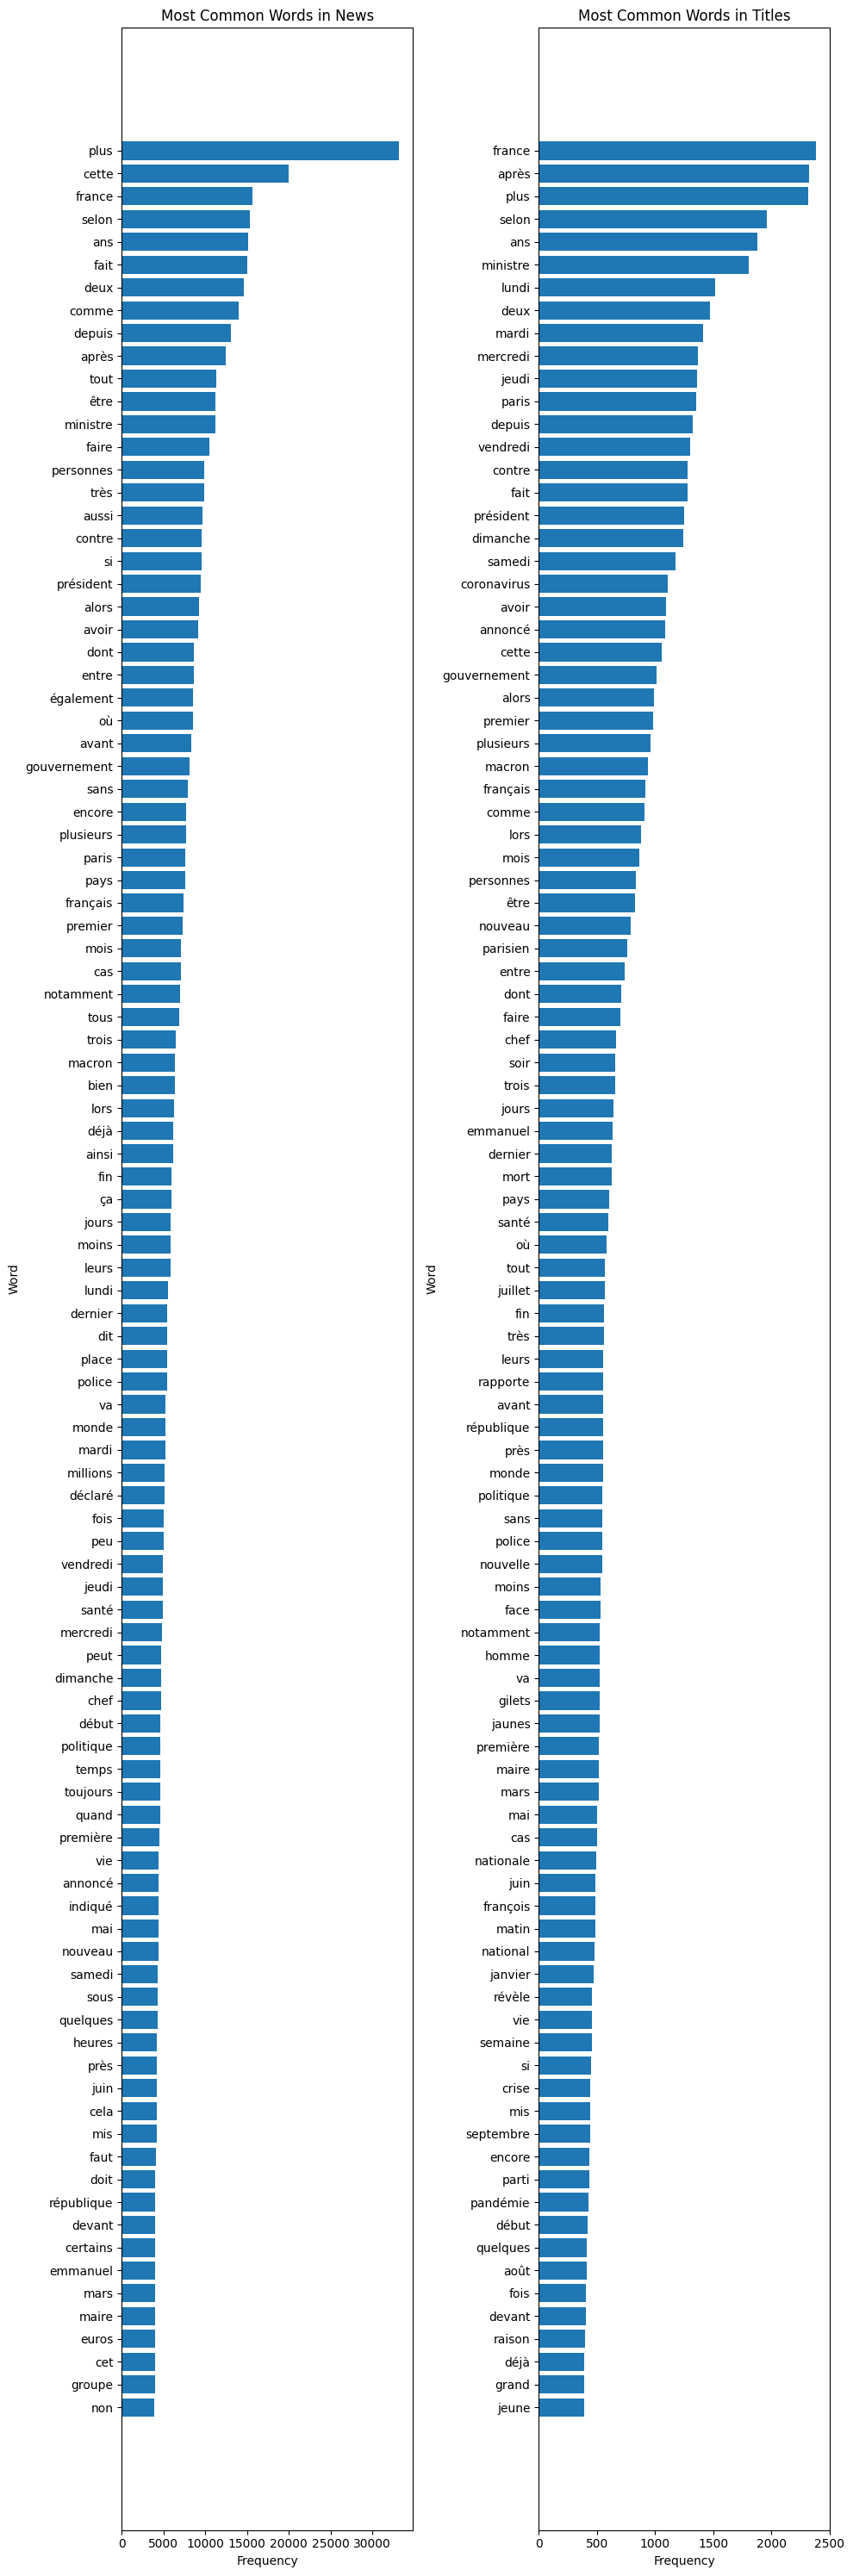

In [43]:
plt.figure(figsize=(10, 30))

plt.subplot(1, 2, 1)
words, counts = zip(*common_news_words)
plt.barh(words, counts)
plt.gca().invert_yaxis()  # invert y-axis to have the highest value on top
plt.title('Most Common Words in News')
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.subplot(1, 2, 2)
words, counts = zip(*common_title_words)
plt.barh(words, counts)
plt.gca().invert_yaxis()  # invert y-axis to have the highest value on top
plt.title('Most Common Words in Titles')
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.tight_layout()
plt.show()

In [164]:
threshold = len(train_df) * 0.05

In [165]:
len(train_df)

21401

In [166]:
threshold

1070.05

In [167]:
title_words = [word for sublist in train_df['title_tokens'] for word in sublist]
title_word_freq = Counter(title_words)

In [168]:
common_title_words = [(word, count) for word, count in title_word_freq.items() if count >= threshold]
common_title_words = sorted(common_title_words, key=lambda x: x[1], reverse=True)

In [169]:
common_title_words

[('a', 12574),
 ('france', 2386),
 ('après', 2326),
 ('plus', 2318),
 ('selon', 1966),
 ('ans', 1882),
 ('ministre', 1803),
 ('lundi', 1518),
 ('deux', 1476),
 ('mardi', 1417),
 ('mercredi', 1373),
 ('jeudi', 1359),
 ('paris', 1351),
 ('depuis', 1326),
 ('vendredi', 1301),
 ('contre', 1283),
 ('fait', 1277),
 ('président', 1252),
 ('dimanche', 1245),
 ('samedi', 1179),
 ('coronavirus', 1109),
 ('avoir', 1092),
 ('annoncé', 1084)]

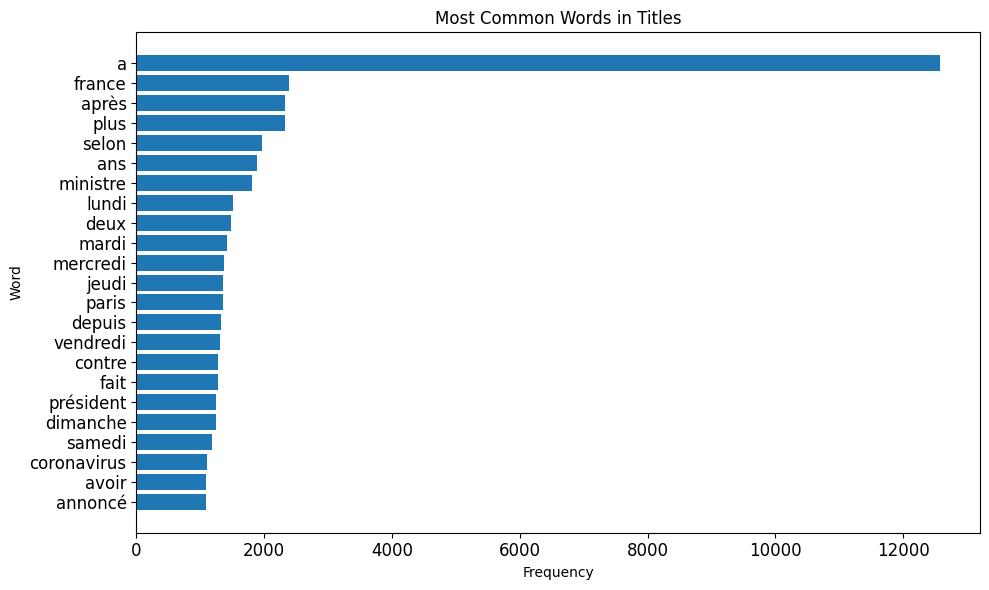

In [106]:
plt.figure(figsize=(10, 6))

words, counts = zip(*common_title_words)
plt.barh(words, counts)
plt.gca().invert_yaxis()  # invert y-axis to have the highest value on top
plt.title('Most Common Words in Titles')
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [107]:
frequent_title_words = ['France', 'Paris', 'français', 'ans', 'années', 'ministre', 'président', 'lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche', 'coronavirus']

In [108]:
frequent_title_words

['France',
 'Paris',
 'français',
 'ans',
 'années',
 'ministre',
 'président',
 'lundi',
 'mardi',
 'mercredi',
 'jeudi',
 'vendredi',
 'samedi',
 'dimanche',
 'coronavirus']

In [111]:
from textblob import TextBlob

def calculate_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [112]:
train_df['sentiment_score'] = train_df['text'].apply(calculate_sentiment)

sentiment_threshold = 0
train_df['sentiment'] = train_df['sentiment_score'].apply(lambda score: 'positive' if score > sentiment_threshold else 'negative' if score < sentiment_threshold else 'neutral')
sentiment_counts = train_df['sentiment'].value_counts()


In [113]:
print("Number of news with positive connotation:", sentiment_counts['positive'])
print("Number of news with negative connotation:", sentiment_counts['negative'])
print("Number of neutral news:", sentiment_counts['neutral'])

Number of news with positive connotation: 8847
Number of news with negative connotation: 4133
Number of neutral news: 8421


In [114]:
train_df

,text,titles,news_tokens,title_tokens,sentiment_score,sentiment
0,Thierry Mariani sur la liste du Rassemblement ...,L'information n'a pas été confirmée par l'inté...,"[thierry, mariani, liste, rassemblement, natio...","[a, confirmée, déclare, toutefois, étudier, qu...",0.000000,neutral
1,C'est désormais officiel : Alain Juppé n'est p...,Le maire de Bordeaux ne fait plus partie des R...,"[désormais, officiel, alain, juppé, plus, memb...","[maire, bordeaux, fait, plus, partie, républic...",0.000000,neutral
2,La mesure est décriée par les avocats et les m...,"En 2020, les tribunaux d'instance fusionnent a...","[mesure, décriée, avocats, magistrats, juridic...","[2020, tribunaux, fusionnent, ceux, grande, in...",0.120833,positive
3,Dans une interview accordée au Figaro mercredi...,"Les médecins jugés ""gros prescripteurs d'arrêt...","[interview, accordée, figaro, mercredi, 17, oc...","[médecins, jugés, gros, prescripteurs, maladie...",0.237500,positive
4,Le préjudice est estimé à 2 millions d'euros. ...,Il aura fallu mobiliser 90 gendarmes pour cett...,"[préjudice, estimé, 2, millions, réseau, reven...","[fallu, mobiliser, 90, gendarmes, cette, opéra...",0.000000,neutral
...,...,...,...,...,...,...
21396,"Une ""main tendue"" que refuse de saisir l'eurod...",POLITIQUE. La présidente du Front national a s...,"[main, tendue, refuse, saisir, nadine, morano,...","[politique, présidente, front, national, a, su...",0.388889,positive
21397,"Venue présenter son dernier spectacle, Elektri...",Que serait un dimanche matin sans un passage e...,"[venue, présenter, dernier, spectacle, elektri...","[dimanche, matin, sans, passage, revue, critiq...",0.112500,positive
21398,Mauvaise nouvelle pour les amateurs de chasse ...,"La chasse à la glu sera interdite cette année,...","[mauvaise, nouvelle, amateurs, chasse, glu, je...","[chasse, glu, interdite, cette, année, a, anno...",0.000000,neutral
21399,"""Ce n'est pas une question de simple voile, c'...","Bruno Le Maire, candidat à la primaire de la d...","[question, simple, voile, question, provocatio...","[bruno, maire, candidat, primaire, droite, rev...",0.000000,neutral


In [133]:
import matplotlib.pyplot as plt
from collections import Counter

def common_words_titles(df, threshold):
    title_words = [word for sublist in df['title_tokens'] for word in sublist]
    title_word_freq = Counter(title_words)
    common_title_words = [(word, count) for word, count in title_word_freq.items() if count >= threshold]
    common_title_words = sorted(common_title_words, key=lambda x: x[1], reverse=True)

    plt.figure(figsize=(8, 6))
    words, counts = zip(*common_title_words)
    plt.barh(words, counts)
    plt.gca().invert_yaxis()  # invert y-axis to have the highest value on top
    plt.title('Most Common Words in Titles')
    plt.xlabel('Frequency')
    plt.ylabel('Word')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()

    return common_title_words

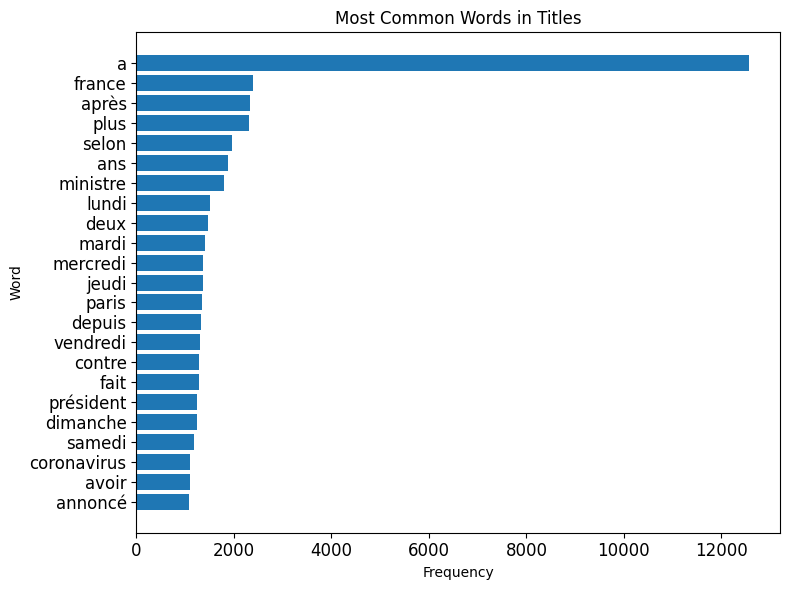

In [144]:
threshold = len(train_df) * 0.05
common_title = common_words_titles(train_df, threshold)

In [145]:
common_title

[('a', 12574),
 ('france', 2386),
 ('après', 2326),
 ('plus', 2318),
 ('selon', 1966),
 ('ans', 1882),
 ('ministre', 1803),
 ('lundi', 1518),
 ('deux', 1476),
 ('mardi', 1417),
 ('mercredi', 1373),
 ('jeudi', 1359),
 ('paris', 1351),
 ('depuis', 1326),
 ('vendredi', 1301),
 ('contre', 1283),
 ('fait', 1277),
 ('président', 1252),
 ('dimanche', 1245),
 ('samedi', 1179),
 ('coronavirus', 1109),
 ('avoir', 1092),
 ('annoncé', 1084)]

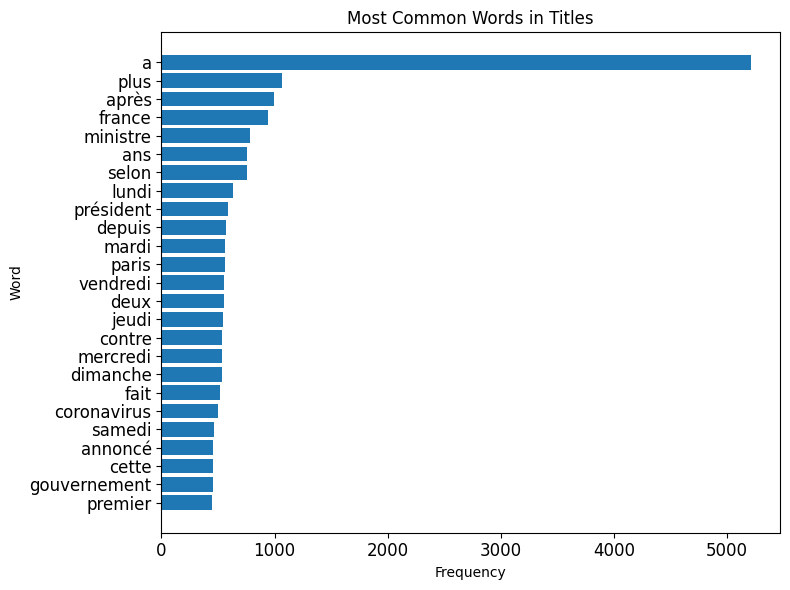

In [146]:
tain_df_positive = train_df[train_df['sentiment'] == 'positive']
threshold_positive = len(tain_df_positive) * 0.05
common_title_positive = common_words_titles(tain_df_positive, threshold_positive)

In [147]:
common_title_positive

[('a', 5207),
 ('plus', 1063),
 ('après', 994),
 ('france', 940),
 ('ministre', 780),
 ('ans', 756),
 ('selon', 754),
 ('lundi', 630),
 ('président', 588),
 ('depuis', 568),
 ('mardi', 566),
 ('paris', 561),
 ('vendredi', 557),
 ('deux', 556),
 ('jeudi', 545),
 ('contre', 539),
 ('mercredi', 534),
 ('dimanche', 533),
 ('fait', 517),
 ('coronavirus', 497),
 ('samedi', 469),
 ('annoncé', 460),
 ('cette', 455),
 ('gouvernement', 453),
 ('premier', 448)]

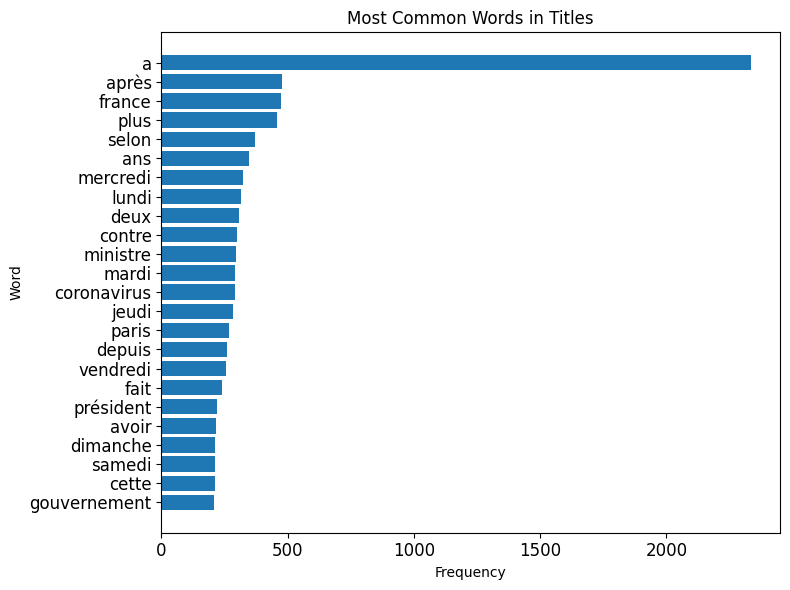

In [148]:
tain_df_negative= train_df[train_df['sentiment'] == 'negative']
threshold_negative = len(tain_df_negative) * 0.05
common_title_negative = common_words_titles(tain_df_negative, threshold_negative)

In [149]:
common_title_negative

[('a', 2333),
 ('après', 479),
 ('france', 475),
 ('plus', 456),
 ('selon', 372),
 ('ans', 345),
 ('mercredi', 324),
 ('lundi', 316),
 ('deux', 306),
 ('contre', 298),
 ('ministre', 296),
 ('mardi', 293),
 ('coronavirus', 291),
 ('jeudi', 282),
 ('paris', 268),
 ('depuis', 261),
 ('vendredi', 254),
 ('fait', 239),
 ('président', 222),
 ('avoir', 216),
 ('dimanche', 213),
 ('samedi', 213),
 ('cette', 213),
 ('gouvernement', 207)]

In [153]:
words_negative = [word[0] for word in common_title_negative]
words_positive = [word[0] for word in common_title_positive]
words = [word[0] for word in common_title]

freq_title_words = list(set(words_negative + words_positive + words))
freq_title_words

['lundi',
 'cette',
 'annoncé',
 'avoir',
 'plus',
 'premier',
 'deux',
 'dimanche',
 'samedi',
 'contre',
 'jeudi',
 'fait',
 'selon',
 'coronavirus',
 'après',
 'président',
 'mardi',
 'depuis',
 'mercredi',
 'vendredi',
 'gouvernement',
 'ans',
 'paris',
 'ministre',
 'a',
 'france']

In [178]:
freq_title = ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche', 'gouvernement', 'président', 'ministre', 'premier', 'coronavirus', 'ans', 'années', 'france', 'paris', 'français']
freq_title

['lundi',
 'mardi',
 'mercredi',
 'jeudi',
 'vendredi',
 'samedi',
 'dimanche',
 'gouvernement',
 'président',
 'ministre',
 'premier',
 'coronavirus',
 'ans',
 'années',
 'france',
 'paris',
 'français']

In [184]:
total_news = len(train_df)

news_with_words_in_title = 0
news_with_words_in_text = 0
news_with_words_in_both = 0

for index, row in train_df.iterrows():
    title_tokens = row['title_tokens']
    text_tokens = row['news_tokens']

    if any(word in title_tokens for word in freq_title):
        news_with_words_in_title += 1

    if any(word in text_tokens for word in freq_title):
        news_with_words_in_text += 1

    if any(word in title_tokens for word in freq_title) and any(word in text_tokens for word in freq_title):
        news_with_words_in_both += 1

print("Total number of news in train_df:", total_news)
print("News with words from freq_title in the title:", news_with_words_in_title)
print("News with words from freq_title in the text:", news_with_words_in_text)
print("News with words from freq_title in both (title and text):", news_with_words_in_both)


Total number of news in train_df: 21401
News with words from freq_title in the title: 13730
News with words from freq_title in the text: 20578
News with words from freq_title in both (title and text): 13363


In [185]:
news_with_words_in_both/news_with_words_in_text

0.6493828360384877